<a href="https://colab.research.google.com/github/nathamon24/image-processing/blob/main/Activity/Activity%234/Lab4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

## **Step1 : Read Image file**

In [4]:
#Read image file
original_img = cv2.imread("/content/img1.JPG")
img_RGB = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img_RGB, (224, 224))

## **Step2 :  Load VGG16 model and model detail from tensorflow.keras**

In [5]:
#Load VGG16 model from tensorflow.keras
model = VGG16()
# model detail
model.summary()

553476096/553467096 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

## **Step3 : Retrieve kernel weights from the 1st Convolutional layer**

In [6]:
#retrieve kernel weights from the 1st Convolutional layer
kernels, biases = model.layers[1].get_weights()
# View CNN layer 1 architecture
model.layers[1].get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 64,
 'groups': 1,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'block1_conv1',
 'padding': 'same',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

## **Step4 : Preprocess Image using keras and numpy**

In [7]:
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample’
# -> reshape 3D(H,W,Ch) image to 4D image (sample,H,W,Ch)
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img_ready = preprocess_input(img)

## **Step5 : Extract Model CNN Layer 1**

In [8]:
# Extract Model CNN Layer 1
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


## **Step6-7 : Extract Results from CNN Layer 1 and Show image** 

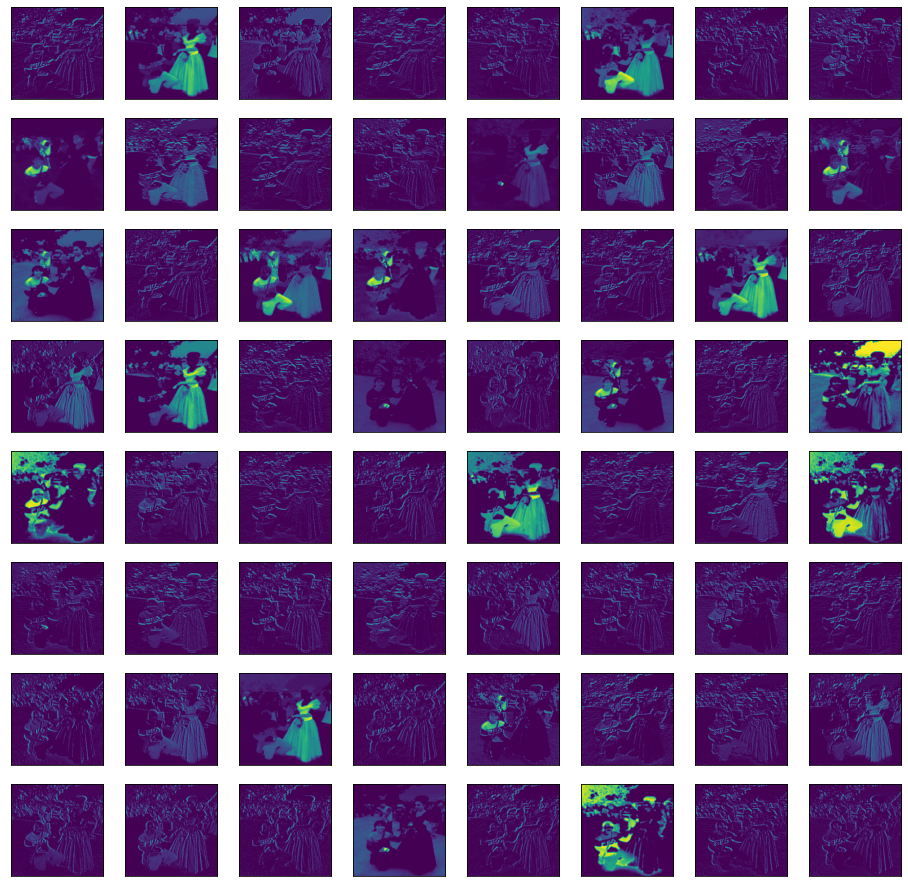

In [9]:
feature_maps = model.predict(img_ready)
#n_filters = 64
i = 8
j = 8
index = 1

plt.figure(figsize=(16,16))

for _ in range(i):
	for _ in range(j):
		ax = plt.subplot(i, j, index)
		ax.set_xticks([])
		ax.set_yticks([])
		plt.imshow(feature_maps[0, :, :, index-1])
		index += 1